In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(limma)
setwd('/home/data/t060324/jobs/aimin/')
source('./code/source/functions.R')

In [2]:
library(testSctpa)

In [5]:
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')

## 1.selected module visualization- heatmap

In [3]:
fisher_platinum_response_Res <- readRDS(file = './output/MEGENA/fisher_platinum_response_Res.RDS')
fisher_NACT_induced_Res <- readRDS(file = './output/MEGENA/fisher_NACT_induced_Res.RDS')
fisher_DFS_COX_Res <- readRDS(file = './output/MEGENA/fisher_DFS_COX_Res.RDS')
fisher_FFI_COX_Res <- readRDS(file = './output/MEGENA/fisher_FFI_COX_Res.RDS')
fisher_OS_COX_Res <- readRDS(file = './output/MEGENA/fisher_OS_COX_Res.RDS')

In [6]:
fisher_platinum_response_Res_select <- subset(fisher_platinum_response_Res,set1_Name%in%all_signiff_modules_fisher)
fisher_NACT_induced_Res_select <- subset(fisher_NACT_induced_Res,set1_Name%in%all_signiff_modules_fisher)
fisher_OS_COX_Res_select <- subset(fisher_OS_COX_Res,set1_Name%in%all_signiff_modules_fisher)
fisher_FFI_COX_Res_select <- subset(fisher_FFI_COX_Res,set1_Name%in%all_signiff_modules_fisher)
fisher_DFS_COX_Res_select <- subset(fisher_DFS_COX_Res,set1_Name%in%all_signiff_modules_fisher)

In [7]:
write.table(x = fisher_platinum_response_Res_select, file = './output/bulk/section_1/platinum_response_gene_signature_EnrichmentRes.txt',quote = F,sep = '\t',row.names =F )
write.table(x = fisher_NACT_induced_Res_select, file = './output/bulk/section_1/NACT_induced_gene_signature_EnrichmentRes.txt',quote = F,sep = '\t',row.names =F)
write.table(x = fisher_OS_COX_Res_select, file = './output/bulk/section_1/OS_gene_signature_EnrichmentRes.txt',quote = F,sep = '\t',row.names =F)
write.table(x = fisher_FFI_COX_Res_select, file = './output/bulk/section_1/PFS_gene_signature_EnrichmentRes.txt',quote = F,sep = '\t',row.names =F)
write.table(x = fisher_DFS_COX_Res_select, file = './output/bulk/section_1/DFS_gene_signature_EnrichmentRes.txt',quote = F,sep = '\t',row.names =F)


In [8]:
module_feactor <- matrix(0,nrow = length(all_signiff_modules_fisher),ncol = 10)
rownames(module_feactor) <- all_signiff_modules_fisher
colnames(module_feactor) <- c('G.OS','G.PFS','G.DFS','B.OS','B.PFS','B.DFS','platinum.R','platinum.S','induced.up','induced.down')
for(i in all_signiff_modules_fisher){
    module_feactor[i,1] <- -log10(subset(fisher_OS_COX_Res,set1_Name==i&set2_Name=='good')$corrected.FET.pvalue)
    module_feactor[i,2] <- -log10(subset(fisher_FFI_COX_Res,set1_Name==i&set2_Name=='good')$corrected.FET.pvalue)
    module_feactor[i,3] <- -log10(subset(fisher_DFS_COX_Res,set1_Name==i&set2_Name=='good')$corrected.FET.pvalue)
    module_feactor[i,4] <- -(-log10(subset(fisher_OS_COX_Res,set1_Name==i&set2_Name=='bad')$corrected.FET.pvalue))
    module_feactor[i,5] <- -(-log10(subset(fisher_FFI_COX_Res,set1_Name==i&set2_Name=='bad')$corrected.FET.pvalue))
    module_feactor[i,6] <- -(-log10(subset(fisher_DFS_COX_Res,set1_Name==i&set2_Name=='bad')$corrected.FET.pvalue))
    module_feactor[i,7] <- -(-log10(subset(fisher_platinum_response_Res,set1_Name==i&set2_Name=='Resistant')$corrected.FET.pvalue))
    module_feactor[i,8] <- -log10(subset(fisher_platinum_response_Res,set1_Name==i&set2_Name=='Sensitive')$corrected.FET.pvalue)
    module_feactor[i,9] <- -log10(subset(fisher_NACT_induced_Res,set1_Name==i&set2_Name=='after')$corrected.FET.pvalue)
    module_feactor[i,10] <- -(-log10(subset(fisher_NACT_induced_Res,set1_Name==i&set2_Name=='before')$corrected.FET.pvalue))
}

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

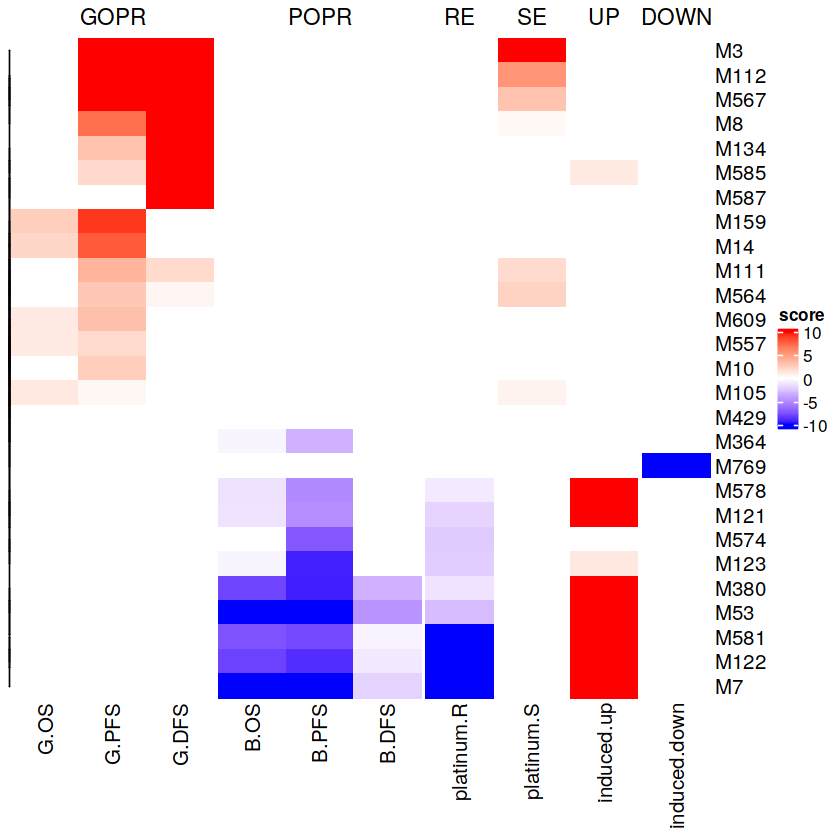

In [9]:
module_feactor[which(module_feactor>10)]=10
module_feactor[which(module_feactor< -10)]=-10
rownames(module_feactor) <- gsub(pattern = 'c1_',replacement = 'M',rownames(module_feactor))
library(ComplexHeatmap)
set.seed(1234)
library(circlize)
col_fun = colorRamp2(c(-10,0, 10), c("blue", "white", "red"))


group = factor(c('GOPR','GOPR','GOPR','POPR','POPR','POPR','RE','SE','UP','DOWN'),levels = c('GOPR','POPR','RE','SE','UP','DOWN'))

ph <- Heatmap(module_feactor,name = 'score',col = col_fun,cluster_columns = F, cluster_row_slices = F,row_dend_width = unit(0, "mm"),column_split = group)
ph

In [315]:
pdf(file = './output/bulk/section_1/2.MEGENA_module_feature_heatmap.pdf',width = 6,height = 7)
print(ph)
dev.off()

png 
  2

## 2.Module characterization-bulk level

In [3]:
load(file = './data/bulk/OV_TPM.RData')

In [135]:
max(OV_TPM)

[1] 92360.65

In [59]:
  library(AnnoProbe)

AnnoProbe v 0.1.6  welcome to use AnnoProbe!
If you use AnnoProbe in published research, please acknowledgements:
We thank Dr.Jianming Zeng(University of Macau), and all the members of his bioinformatics team, biotrainee, for generously sharing their experience and codes.



In [ ]:
OV_TPM <- exp_idchange(data = OV_TPM,idRaw='ENSEMBL',idTo='SYMBOL')
dim(OV_TPM)

In [ ]:
OV_TPM_log <-  log2(OV_TPM+1)
max(OV_TPM_log)

In [29]:
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")

In [6]:
all_signiff_modules_fisher

[1] "c1_3"   "c1_7"   "c1_14"  "c1_53"  "c1_105" "c1_111" "c1_112" "c1_159"
 [9] "c1_380" "c1_429" "c1_557" "c1_564" "c1_609" "c1_8"   "c1_122" "c1_134"
[17] "c1_567" "c1_585" "c1_587" "c1_10"  "c1_121" "c1_123" "c1_364" "c1_574"
[25] "c1_578" "c1_581" "c1_769"

In [6]:
ALLnode_select_TCGA_MEGENA <- readRDS(file='/home/data/t060324/jobs/aimin/output/MEGENA/ALLnode_select_TCGA_MEGENA.RDS')

## GSVA module correlation

In [66]:
library(GSVA)

In [67]:
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [141]:
#ALLnode_select_TCGA_MEGENA <- readRDS('./output/MEGENA/ALLnode_select_TCGA_MEGENA.RDS')

In [142]:
#modules_list <- split(ALLnode_select_TCGA_MEGENA$node,f = ALLnode_select_TCGA_MEGENA$module)

In [68]:
length(modules_list)

[1] 27

In [69]:
names(modules_list)

[1] "c1_3"   "c1_7"   "c1_14"  "c1_53"  "c1_105" "c1_111" "c1_112" "c1_159"
 [9] "c1_380" "c1_429" "c1_557" "c1_564" "c1_609" "c1_8"   "c1_122" "c1_134"
[17] "c1_567" "c1_585" "c1_587" "c1_10"  "c1_121" "c1_123" "c1_364" "c1_574"
[25] "c1_578" "c1_581" "c1_769"

In [70]:
OV_TPM_log <- readRDS(file = './data/bulk/TCGA_OV_TPM_log.RDS')

In [71]:
OV_TPM_log[1:6,1:6]

,TCGA.23.1120.01A,TCGA.29.1695.01A,TCGA.61.2003.01A,TCGA.13.1404.01A,TCGA.23.1027.01A,TCGA.23.1022.01A
A1BG,1.06722213,0.2307168,0.50202920,0.07290544,0.1486039,0.2999975
A1BG-AS1,2.52390960,1.2745553,1.52991550,0.47540154,0.6272860,1.4425001
A1CF,0.04707233,0.0000000,0.02016811,0.03086242,0.0000000,0.0000000
A2M,6.14355060,7.7005029,8.06920780,6.31715801,6.8167526,5.5993737
A2M-AS1,2.37782336,2.2126876,2.62292769,2.38276865,1.5853730,0.4688678
A2ML1,0.13981025,3.5469300,0.08638179,0.17369815,0.8636846,0.4770556


In [72]:
modules_score2 <- gsva(expr = OV_TPM_log,gset.idx.list = modules_list,method='gsva',kcdf="Gaussian")

Warning message in .filterFeatures(expr, method):
“731 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


Estimating GSVA scores for 27 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



In [212]:
library(pheatmap)

In [40]:
rownames(modules_score2) <- gsub(pattern = 'c1_',replacement = 'M',rownames(modules_score2))

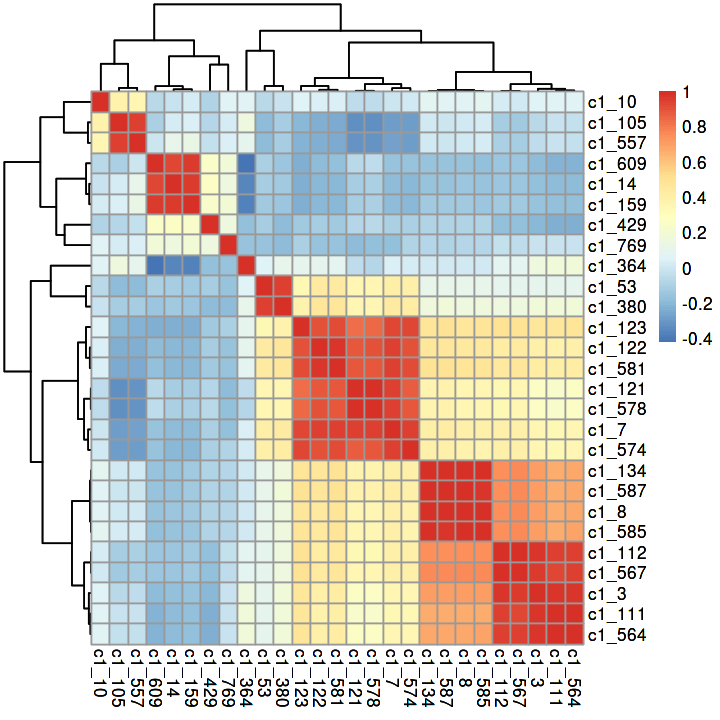

In [233]:
options(repr.plot.height = 6, repr.plot.width = 6)
test <- cor(t(modules_score2))
p1 <- pheatmap::pheatmap(test)
p1

In [234]:
pdf(file = './output/bulk/2.MEGENA_modulesRelationship.pdf',width = 5,height = 5)
print(p1)
dev.off()

png 
  2

In [74]:
dim(modules_score2)

[1]  27 379

### 2.1 Cox regression analysis & Consensus Clustering subgroups

In [75]:
colnames(modules_score2) <- gsub(pattern = '\\.',replacement = '-',colnames(modules_score2))
colnames(modules_score2) <- substr(colnames(modules_score2),start = 1,stop = 12)
modules_score2[1:6,1:6]

,TCGA-23-1120,TCGA-29-1695,TCGA-61-2003,TCGA-13-1404,TCGA-23-1027,TCGA-23-1022
c1_3,0.4476063,0.4030226,0.4763010,-0.2249126,-0.4011496,-0.5195843
c1_7,-0.2316157,0.5004790,0.5618071,0.4396789,0.3888735,-0.4145202
c1_14,0.4189226,0.6749753,0.4391735,0.1935107,0.2509577,0.1986408
c1_53,-0.4897028,-0.3760493,0.1633427,-0.3024560,0.4043514,-0.5455543
c1_105,0.7050814,-0.8343998,-0.6183772,0.5702013,-0.2646704,0.1203344
c1_111,0.5608457,0.3698800,0.5584025,-0.1981383,-0.2764698,-0.5987212


In [76]:
tmp_exp <- OV_TPM_log
colnames(tmp_exp) <- gsub(pattern = '\\.',replacement = '-',colnames(tmp_exp))
colnames(tmp_exp) <- substr(colnames(tmp_exp),start = 1,stop = 12)

In [79]:
bothSample <- intersect(colnames(modules_score2),dataMerge_subset$patient_id)

dataMerge_subset2 <- dataMerge_subset[match(bothSample,dataMerge_subset$patient_id),]
dataMerge_subset2$HRD_status <- ifelse(dataMerge_subset2$HRD>=41,'HRD','HRP')
modules_score2 <- modules_score2[,bothSample]
tmp_data <- dataMerge_subset2

In [242]:
tmp_exp <- tmp_exp[,bothSample]

In [214]:
dim(tmp_exp)

[1] 32936   335

In [57]:
library(ConsensusClusterPlus)

In [41]:
rownames(modules_score2)

[1] "M3"   "M7"   "M14"  "M53"  "M105" "M111" "M112" "M159" "M380" "M429"
[11] "M557" "M564" "M609" "M8"   "M122" "M134" "M567" "M585" "M587" "M10" 
[21] "M121" "M123" "M364" "M574" "M578" "M581" "M769"

In [62]:
title=tempdir()

In [42]:
select_module <- c('M10','M105','M364','M7','M53','M769','M14','M429','M3','M8')

In [43]:
tmp_data$M10 <- modules_score2['M10',]
tmp_data$M105 <- modules_score2['M105',]
tmp_data$M364<- modules_score2['M364',]
tmp_data$M7<- modules_score2['M7',]
tmp_data$M53<- modules_score2['M53',]
tmp_data$M769<- modules_score2['M769',]
tmp_data$M14<- modules_score2['M14',]
tmp_data$M429<- modules_score2['M429',]
tmp_data$M3<- modules_score2['M3',]
tmp_data$M8<- modules_score2['M8',]

In [130]:
library(survminer)
require("survival")

Loading required package: ggplot2

Loading required package: ggpubr

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




### unifactor cox regression analysis

In [44]:
library(forestplot)

Loading required package: magrittr

Loading required package: checkmate



In [45]:
## OS
univ_formulas <- sapply(select_module,
                        function(x) as.formula(paste('Surv(OS.time, OS.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"module",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"pValue",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
tabletext

NA,NA,NA
module,Hazard Ratio(95% CI),pValue
M10,0.86 (0.65-1.2),0.32
M105,0.66 (0.46-0.94),0.02
M364,1.1 (0.8-1.6),0.47
M7,1.2 (0.82-1.7),0.37
M53,1.6 (1.2-2.3),0.0041
M769,0.84 (0.61-1.2),0.3
M14,0.66 (0.45-0.98),0.039
M429,1.4 (1-2),0.028
M3,0.71 (0.52-0.96),0.028


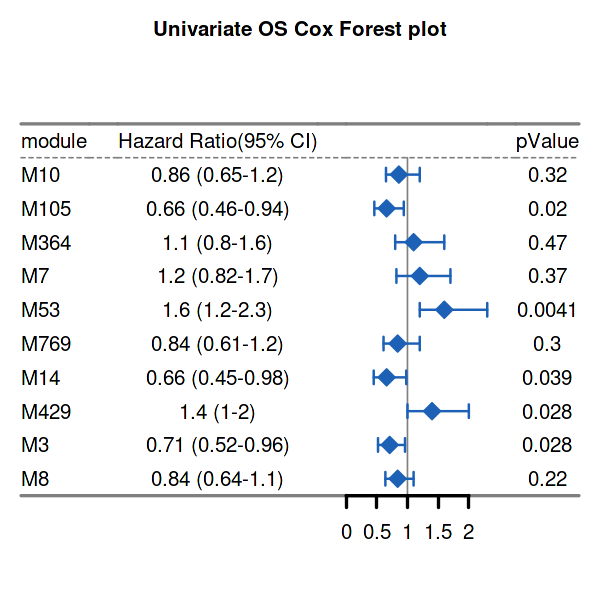

In [46]:
fp <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "13" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate OS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
fp

In [47]:
##PFS
univ_formulas <- sapply(select_module,
                        function(x) as.formula(paste('Surv(FFI.time, FFI.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"module",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"pValue",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
tabletext

NA,NA,NA
module,Hazard Ratio(95% CI),pValue
M10,0.82 (0.64-1),0.11
M105,0.77 (0.57-1),0.072
M364,1.3 (0.99-1.8),0.061
M7,1.3 (0.98-1.8),0.069
M53,1.5 (1.1-2),0.0076
M769,0.73 (0.55-0.97),0.032
M14,0.76 (0.55-1.1),0.11
M429,1.2 (0.94-1.7),0.12
M3,0.76 (0.58-0.98),0.032


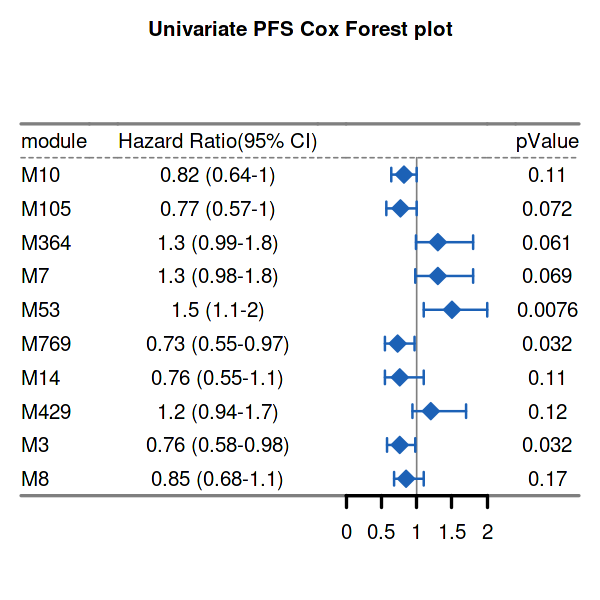

In [48]:
fp2 <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "13" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate PFS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
fp2

In [49]:
#DFS
univ_formulas <- sapply(select_module,
                        function(x) as.formula(paste('Surv(DFS.time, DFS.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"module",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"pValue",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
tabletext

NA,NA,NA
module,Hazard Ratio(95% CI),pValue
M10,0.82 (0.63-1.1),0.13
M105,0.74 (0.54-1),0.057
M364,1.2 (0.85-1.6),0.32
M7,1.2 (0.85-1.6),0.33
M53,1.4 (1-1.9),0.043
M769,0.89 (0.67-1.2),0.45
M14,0.92 (0.65-1.3),0.65
M429,1.1 (0.83-1.5),0.46
M3,0.76 (0.58-1),0.047


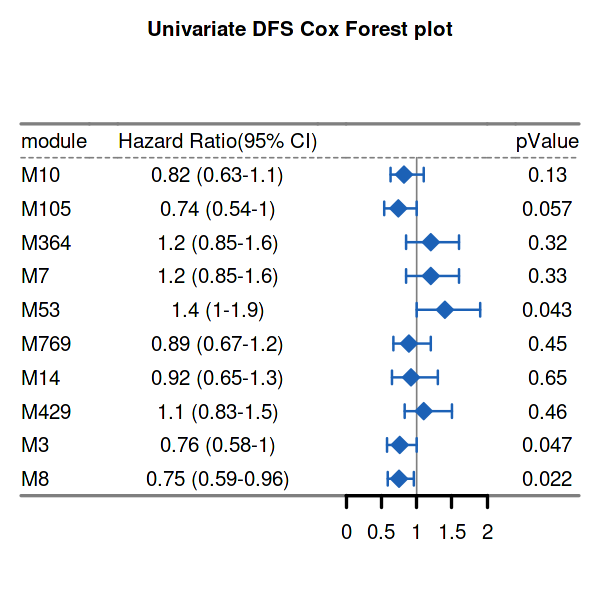

In [50]:
fp3 <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "13" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate DFS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
fp3

In [54]:
pdf(file = './output/bulk/section_1/2.MEGENA_moduleUnivariateCoxForestplot_OS.pdf',width = 4.5,height = 4)
print(fp)
dev.off()
pdf(file = './output/bulk/section_1/2.MEGENA_moduleUnivariateCoxForestplot_PFS.pdf',width = 4.5,height = 4)
print(fp2)
dev.off()
pdf(file = './output/bulk/section_1/2.MEGENA_moduleUnivariateCoxForestplot_DFS.pdf',width = 4.5,height = 4)
print(fp3)
dev.off()

png 
  2

png 
  2

png 
  2

#### Consensus Clustering

In [63]:
results = ConsensusClusterPlus(modules_score2[select_module,],maxK=6,reps=50,pItem=0.8,pFeature=1,
                               title=title,clusterAlg="hc",distance="pearson",seed=1262118388.71279,plot="png")



end fraction

clustered

clustered

clustered

clustered

clustered



In [64]:
tmp_data$ConsensusCluster <- paste0('C',results[[3]][["consensusClass"]])

In [65]:
head(tmp_data)

,aliquot_barcode,patient_id,OS.event,age,anatomic_organ_subdivision,histological_type,person_neoplasm_cancer_status,primary_therapy_outcome,race,site_of_tumor_first_recurrence,⋯,M105,M364,M7,M53,M769,M14,M429,M3,M8,ConsensusCluster
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
204,TCGA-23-1120-01,TCGA-23-1120,0,60,Right,Serous Cystadenocarcinoma,null,null,WHITE,null,⋯,0.7050814,0.1626886,-0.2316157,-0.489702837,-0.29988216,0.4189226,-0.5535116,0.4476063,-0.40272815,C1
472,TCGA-61-2003-01,TCGA-61-2003,0,53,Bilateral,Serous Cystadenocarcinoma,WITH TUMOR,PROGRESSIVE DISEASE,WHITE,null,⋯,-0.6183772,-0.3279534,0.5618071,0.163342653,-0.32340249,0.4391735,0.2731204,0.4763010,-0.03248388,C2
133,TCGA-13-1404-01,TCGA-13-1404,0,48,Bilateral,Serous Cystadenocarcinoma,TUMOR FREE,COMPLETE RESPONSE,WHITE,null,⋯,0.5702013,-0.3112923,0.4396789,-0.302455954,0.58884559,0.1935107,-0.3263462,-0.2249126,0.76047390,C3
191,TCGA-23-1027-01,TCGA-23-1027,1,48,Right,Serous Cystadenocarcinoma,null,PROGRESSIVE DISEASE,WHITE,null,⋯,-0.2646704,0.5581453,0.3888735,0.404351441,0.01755406,0.2509577,0.2452219,-0.4011496,-0.63495219,C1
187,TCGA-23-1022-01,TCGA-23-1022,1,67,Left,Serous Cystadenocarcinoma,WITH TUMOR,COMPLETE RESPONSE,WHITE,METASTASIS,⋯,0.1203344,0.1124582,-0.4145202,-0.545554277,-0.23544290,0.1986408,0.7268380,-0.5195843,-0.37307547,C1
479,TCGA-61-2088-01,TCGA-61-2088,0,51,Bilateral,Serous Cystadenocarcinoma,TUMOR FREE,null,WHITE,null,⋯,-0.2484078,-0.6320620,-0.5481455,-0.002770311,-0.51872931,0.3680577,-0.1494906,-0.7030668,-0.76699507,C1


In [173]:
saveRDS(tmp_data,file='./output/bulk/TCGA_substypeBy_moduleGSVA.RDS')

In [131]:
tmp_data <- readRDS(file='./output/bulk/TCGA_substypeBy_moduleGSVA.RDS')

In [70]:
table(tmp_data$cluster)


 C1  C2  C3 
150  96  89 

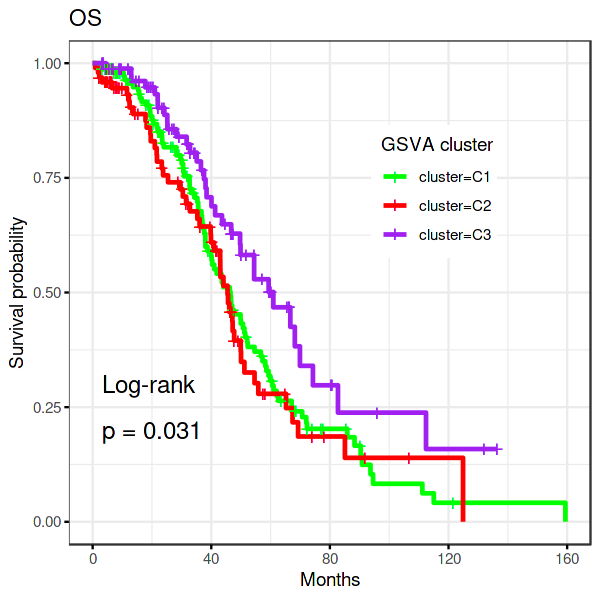

In [71]:
fit <- survfit(Surv(OS.time, OS.event) ~ cluster, data = tmp_data)
OS_surv <- ggsurvplot(
  fit, 
  data = tmp_data,
  title='OS',
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
    palette =  c("green", "red",'purple'),
  risk.table.height = 0.25,
  xlab ='Months',
 legend=c(0.7,0.7),
 legend.title='GSVA cluster',
  ggtheme = theme_bw()      # Change ggplot2 theme
)
options(repr.plot.height = 5, repr.plot.width = 5)
OS_surv

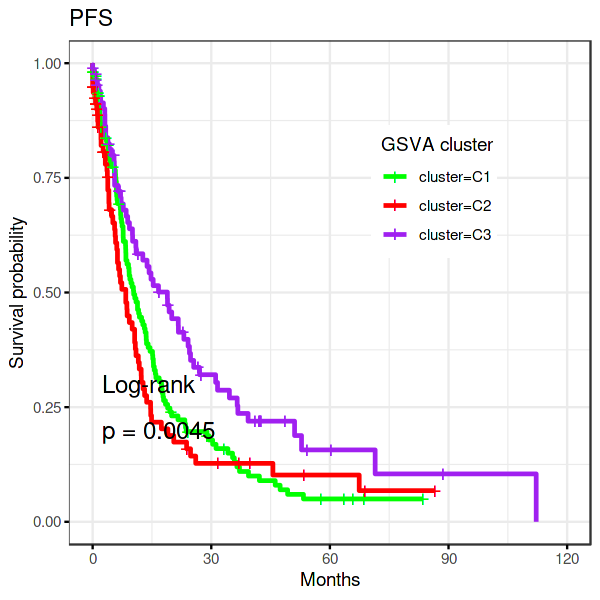

In [72]:
fit <- survfit(Surv(FFI.time, FFI.event) ~ cluster, data = tmp_data)
FFI_surv <- ggsurvplot(
  fit, 
  data = tmp_data, 
  title='PFS',
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
    palette =  c("green", "red",'purple'),
  risk.table.height = 0.25,
  xlab ='Months',
 legend=c(0.7,0.7),
 legend.title='GSVA cluster',
  ggtheme = theme_bw() 
)
options(repr.plot.height = 5, repr.plot.width = 5)
FFI_surv

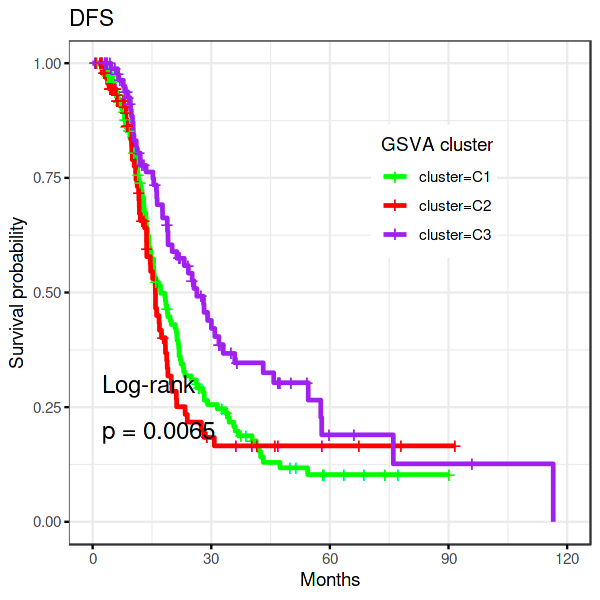

In [73]:
fit <- survfit(Surv(DFS.time, DFS.event) ~ cluster, data = tmp_data)
DFS_surv <- ggsurvplot(
  fit, 
  data = tmp_data,
  title='DFS',
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
    palette =  c("green", "red",'purple'),
  risk.table.height = 0.25,
  xlab ='Months',
 legend=c(0.7,0.7),
 legend.title='GSVA cluster',
  ggtheme = theme_bw() 
)
options(repr.plot.height = 5, repr.plot.width = 5)
DFS_surv

In [93]:
pdf(file = './output/bulk/section_1/2.MEGENA_bulkSubset_ggsurvplot.pdf',width = 3,height = 9)
grid.arrange(OS_surv$plot,FFI_surv$plot,DFS_surv$plot,ncol=1)
dev.off()

png 
  2

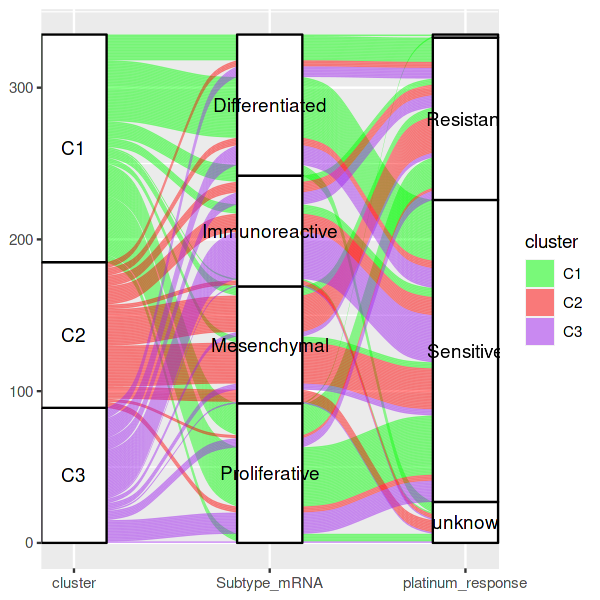

In [75]:
library(ggalluvial)
options(repr.plot.height = 5, repr.plot.width = 5)
alluvial1 <- ggplot(data = tmp_data,
       aes(axis1 = ConsensusCluster, axis2 =Subtype_mRNA, axis3=platinum_response)) +
  scale_x_discrete(limits = c("cluster", "Subtype_mRNA",'platinum_response'),labels = c("cluster", "Subtype_mRNA",'platinum_response'), expand = c(.01, .05)) +
  geom_alluvium(aes(fill = cluster)) + scale_fill_manual(values = c("green", "red",'purple'))+
  geom_stratum() + geom_text(stat = "stratum", aes(label = after_stat(stratum)),reverse = T)
alluvial1

In [135]:
pp1 <- data_explor.discrete2discrete(subset(tmp_data,platinum_response !='unknow' & !is.na(HRD_status)),core_dimension = 'platinum_response',inter_dimension = 'cluster',plot = T,position = 'fill')
pp2 <- data_explor.discrete2discrete(subset(tmp_data,platinum_response !='unknow' & !is.na(HRD_status)),core_dimension = 'Subtype_mRNA',inter_dimension = 'cluster',plot = T,position = 'fill')
pp3 <- data_explor.discrete2discrete(subset(tmp_data,platinum_response !='unknow' & !is.na(HRD_status)),core_dimension = 'HRD_status',inter_dimension = 'cluster',plot = T,position = 'fill')

pp1 <- pp1$plot +scale_fill_manual(values = c("green", "red",'purple'))+theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())
pp2 <- pp2$plot +scale_fill_manual(values = c("green", "red",'purple'))+theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())
pp3 <- pp3$plot +scale_fill_manual(values = c("green", "red",'purple'))+theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())

In [136]:
alluvial1 <- alluvial1 +theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())

In [137]:
library(gridExtra)

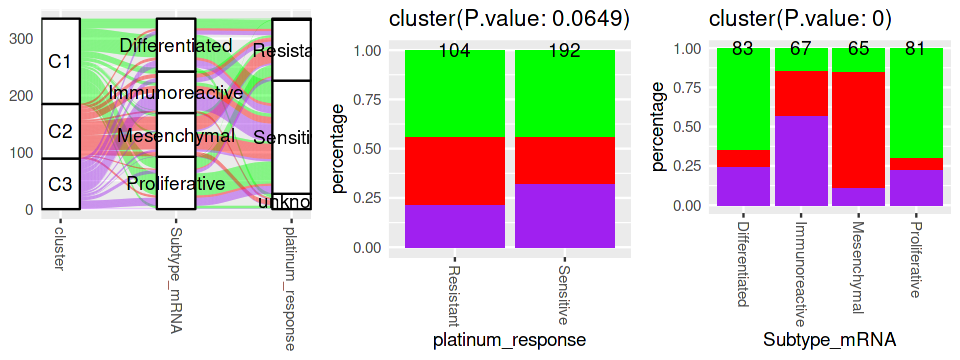

In [138]:
options(repr.plot.height = 3, repr.plot.width = 11)
grid.arrange(alluvial1,pp1,pp2,ncol=3)

In [142]:
pdf(file = './output/bulk/section_1/2.MEGENA_cluster_alluvial1_mRNAsubstype_response.pdf',width = 11,height = 3)
grid.arrange(alluvial1,pp1,pp2,ncol=3)
dev.off()

png 
  2

In [15]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [16]:
table(tmp_data$Subtype_mRNA)


Differentiated Immunoreactive    Mesenchymal  Proliferative 
            93             73             77             92 

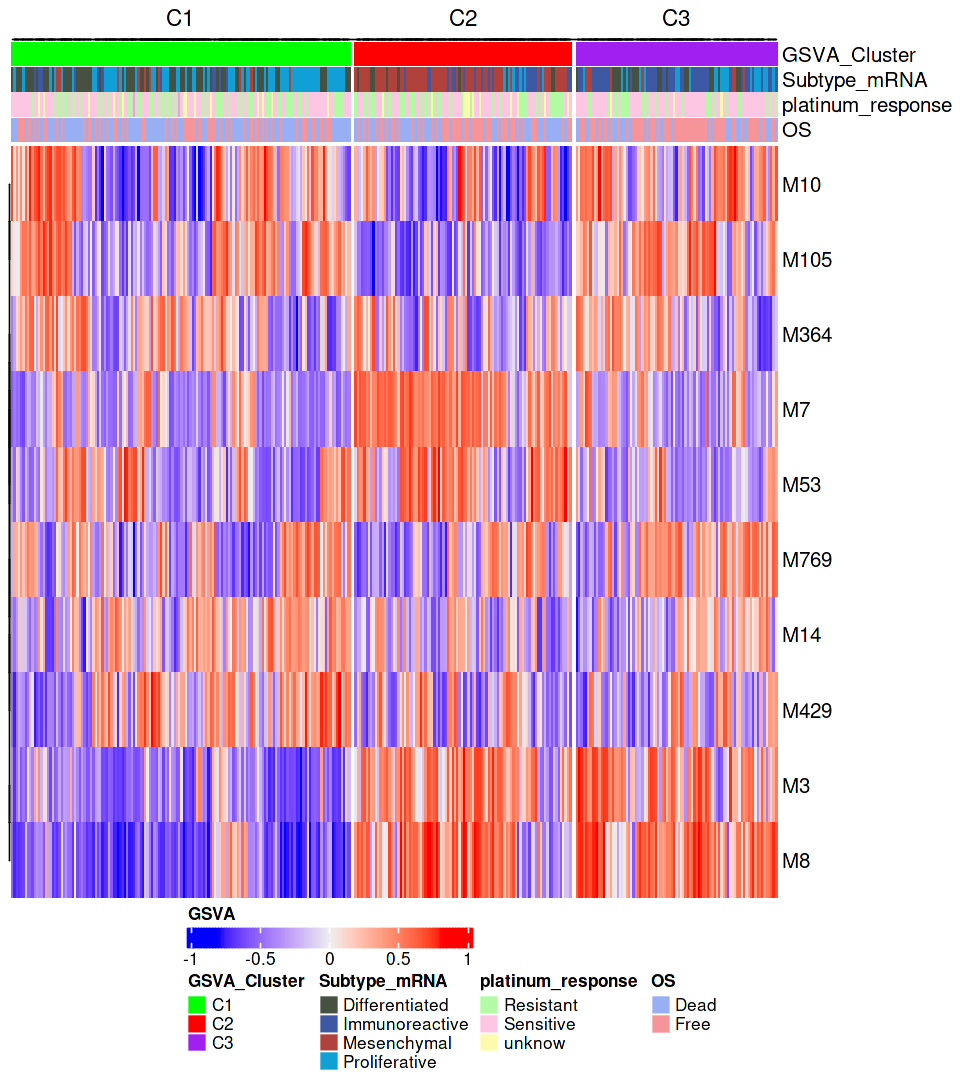

In [88]:
library(ComplexHeatmap)
set.seed(1234)
library(circlize)
col_fun = colorRamp2(c(-2, 0, 2), c("#2fa1dd", "white", "#f87669"))
annotation_col = data.frame(
  'GSVA Cluster' = factor(tmp_data$ConsensusCluster),
  Subtype_mRNA = tmp_data$Subtype_mRNA,
  platinum_response=tmp_data$platinum_response,
  OS=ifelse(tmp_data$OS.event==1,'recur','free')
)
rownames(annotation_col) = colnames(modules_score2)
fa <- as.factor(tmp_data$ConsensusCluster)
dend2 = cluster_within_group(modules_score2[select_module,], fa)
top_annotation = HeatmapAnnotation(GSVA_Cluster = factor(tmp_data$ConsensusCluster),
  Subtype_mRNA = tmp_data$Subtype_mRNA,
  platinum_response=tmp_data$platinum_response,
  OS=ifelse(tmp_data$OS.event==1,'Dead','Free'),
col=list(GSVA_Cluster=c('C1'="green",'C2'= "red",'C3'='purple')
        )
  )

p <- Heatmap(modules_score2[select_module,],name = 'GSVA', cluster_columns = dend2,show_column_names = F,cluster_row_slices = F,row_dend_width = unit(0, "mm"),column_dend_height=unit(0, "mm"),column_split = 3,
    top_annotation = top_annotation,heatmap_legend_param = list(
               legend_direction = "horizontal", 
               legend_width = unit(6, "cm")))
draw(p,heatmap_legend_side = "bottom", annotation_legend_side="bottom")

In [108]:
options(repr.plot.height = 8, repr.plot.width = 8)
draw(p,heatmap_legend_side = "bottom", annotation_legend_side="bottom")

In [91]:
pdf(file = './output/bulk/section_1/2.MEGENA_bulkSubset_byModule.pdf',width = 8,height = 9)
draw(p,heatmap_legend_side = "bottom", annotation_legend_side="bottom")
dev.off()

png 
  2

In [161]:
options(repr.plot.height = 5, repr.plot.width = 5)
boxGroup1 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M3',plot = T)
boxGroup2 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M8',plot = T)
boxGroup3 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M7',plot = T)
boxGroup4 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M53',plot = T)
boxGroup5 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M769',plot = T)
boxGroup6 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'HRD',plot = T)
boxGroup7 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M10',plot = T)
boxGroup8 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'M14',plot = T)
boxGroup9 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'Immune_score',plot = T)
boxGroup10 <- data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'Stromal_score',plot = T)
boxGroup11 <-  data_explor.discrete2continuous(tmp_data,core_dimension = 'cluster',inter_dimension = 'purity',plot = T)

In [147]:
library(ggsci)

In [162]:
boxGroup1$plot <- boxGroup1$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup2$plot <- boxGroup2$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup3$plot <- boxGroup3$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup4$plot <- boxGroup4$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup5$plot <- boxGroup5$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup6$plot <- boxGroup6$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup7$plot <- boxGroup7$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup8$plot <- boxGroup8$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup9$plot <- boxGroup9$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup10$plot <- boxGroup10$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")
boxGroup11$plot <- boxGroup11$plot+ scale_fill_manual("cluster", values =  c('C1'="green",'C2'= "red",'C3'='purple'))+theme(legend.position="none")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale

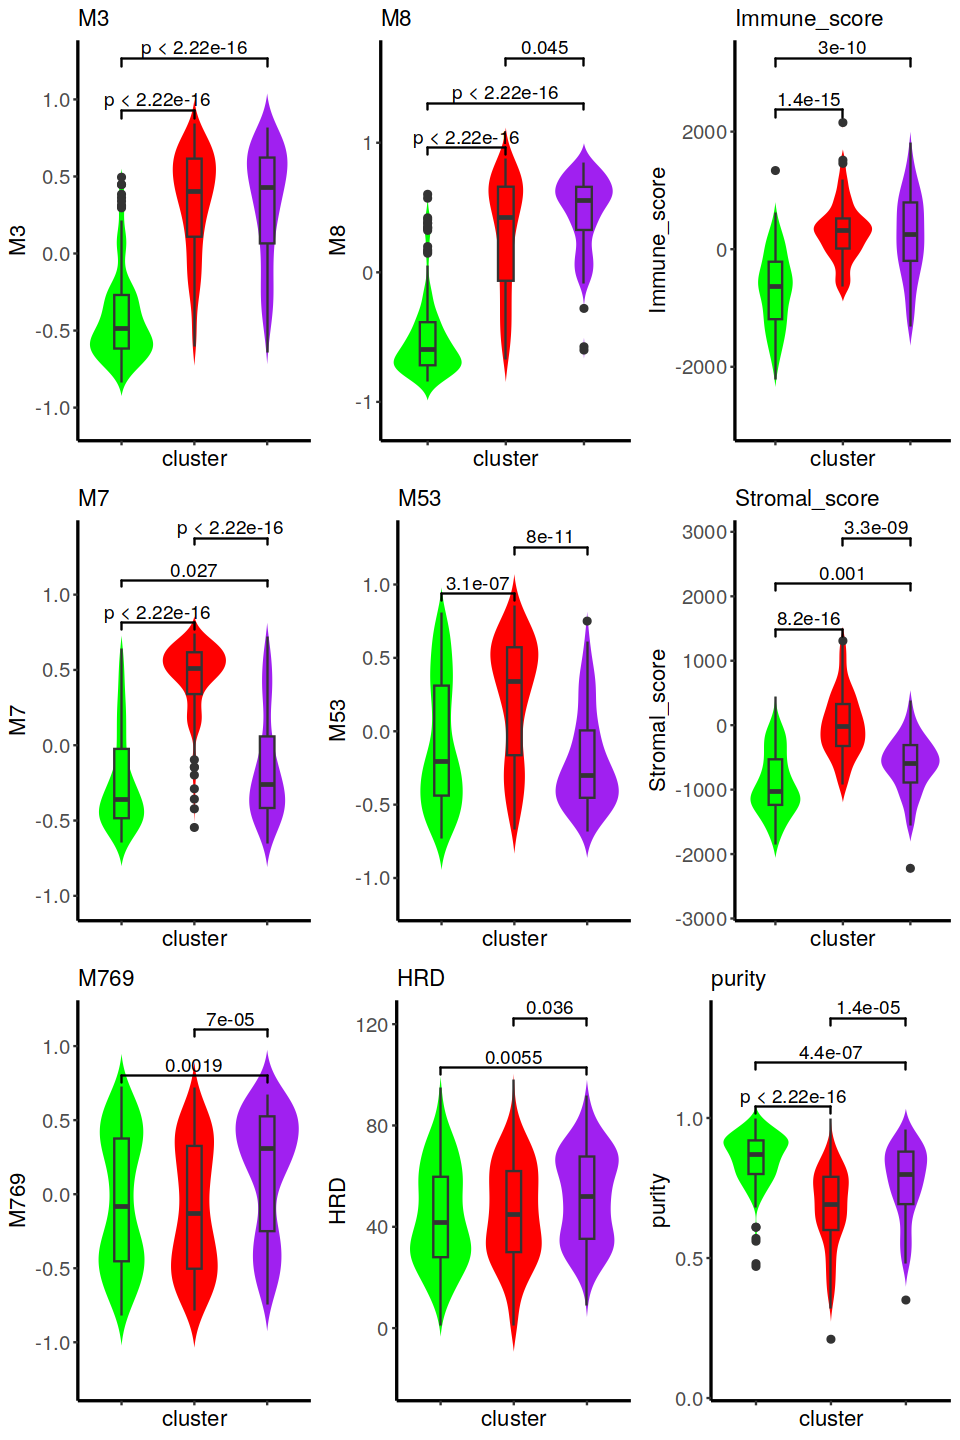

In [163]:
options(repr.plot.height = 12, repr.plot.width = 8)
grid.arrange(boxGroup1$plot,boxGroup2$plot,boxGroup9$plot,boxGroup3$plot,boxGroup4$plot,boxGroup10$plot,boxGroup5$plot,boxGroup6$plot,boxGroup11$plot,ncol=3)

In [164]:
pdf(file = './output/bulk/section_1/2.MEGENA_Boxplot_subGroup.pdf',width = 8,height = 11)
grid.arrange(boxGroup1$plot,boxGroup2$plot,boxGroup9$plot,boxGroup3$plot,boxGroup4$plot,boxGroup10$plot,boxGroup5$plot,boxGroup6$plot,boxGroup11$plot,ncol=3)
dev.off()

png 
  2

In [168]:
ModulescorModules1 <- ggscatter(data =tmp_data,x = 'M7',y = 'M3',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules2 <- ggscatter(data =tmp_data,x = 'M7',y = 'M8',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules3 <- ggscatter(data =tmp_data,x = 'M7',y = 'M53',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules4 <- ggscatter(data =tmp_data,x = 'M3',y = 'M8',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules5 <- ggscatter(data =tmp_data,x = 'purity',y = 'M7',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules6 <- ggscatter(data =tmp_data,x = 'purity',y = 'M3',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules7 <- ggscatter(data =tmp_data,x = 'purity',y = 'M8',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))
ModulescorModules8 <- ggscatter(data =tmp_data,x = 'purity',y = 'M53',size = 0.5,color = 'gray',add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\n",color='black'))


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

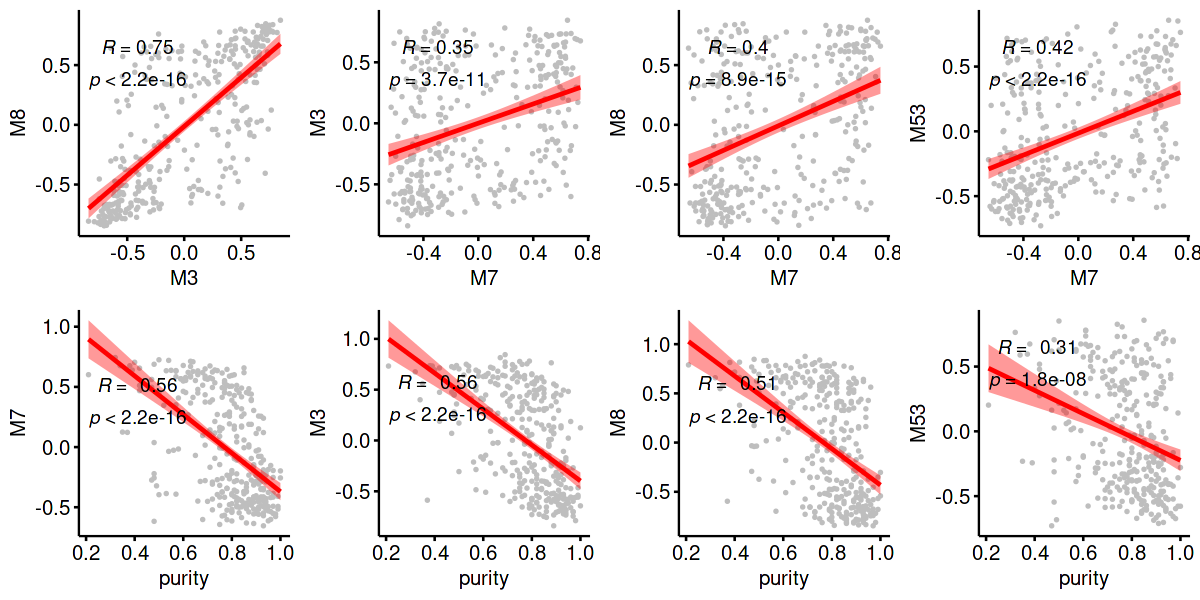

In [169]:
options(repr.plot.height = 5, repr.plot.width = 10)
grid.arrange(ModulescorModules4,ModulescorModules1,ModulescorModules2,ModulescorModules3,ModulescorModules5,ModulescorModules6,ModulescorModules7,ModulescorModules8,ncol=4)

In [170]:
pdf(file = './output/bulk/section_1/2.MEGENA_ModuleCor2purity.pdf',width = 10,height = 5)
grid.arrange(ModulescorModules4,ModulescorModules1,ModulescorModules2,ModulescorModules3,ModulescorModules5,ModulescorModules6,ModulescorModules7,ModulescorModules8,ncol=4)
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

png 
  2

### 2.3 module to HALLMARKEs

In [308]:
library(GSVA)
library(msigdbr)
HALLMARKE_PT <- msigdbr(species = "Homo sapiens", category = "H") %>% dplyr::select(gs_name, gene_symbol)
HALLMARKE_list <- split(HALLMARKE_PT$gene_symbol,f = HALLMARKE_PT$gs_name)

In [310]:
OV_HALLMARKE_genesetGSVA <- gsva(expr=OV_TPM_log, gset.idx.list=HALLMARKE_list, kcdf="Gaussian",method='gsva', parallel.sz=1)


Warning message in .filterFeatures(expr, method):
“731 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


Estimating GSVA scores for 50 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



In [311]:
rownames(OV_HALLMARKE_genesetGSVA) <- sub(pattern = 'HALLMARK_',replacement = '',rownames(OV_HALLMARKE_genesetGSVA))

In [304]:
modules_score <- gsva(expr = OV_TPM_log,gset.idx.list = modules_list,method='gsva',kcdf="Gaussian")

Warning message in .filterFeatures(expr, method):
“731 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


Estimating GSVA scores for 27 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



In [305]:
rownames(modules_score) <- gsub(pattern = 'c1_',replacement = 'M',rownames(modules_score))

In [38]:
modules_score[1:6,1:6]

,TCGA.23.1120.01A,TCGA.29.1695.01A,TCGA.61.2003.01A,TCGA.13.1404.01A,TCGA.23.1027.01A,TCGA.23.1022.01A
M3,0.4476063,0.4030226,0.4763010,-0.2249126,-0.4011496,-0.5195843
M7,-0.2316157,0.5004790,0.5618071,0.4396789,0.3888735,-0.4145202
M14,0.4189226,0.6749753,0.4391735,0.1935107,0.2509577,0.1986408
M53,-0.4897028,-0.3760493,0.1633427,-0.3024560,0.4043514,-0.5455543
M105,0.7050814,-0.8343998,-0.6183772,0.5702013,-0.2646704,0.1203344
M111,0.5608457,0.3698800,0.5584025,-0.1981383,-0.2764698,-0.5987212


In [660]:
cor.res <- cor.test(OV_HALLMARKE_genesetGSVA[1,],modules_score[1,])
cor.res


	Pearson's product-moment correlation

data:  OV_HALLMARKE_genesetGSVA[1, ] and modules_score[1, ]
t = 4.671, df = 377, p-value = 4.177e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1363729 0.3269262
sample estimates:
      cor 
0.2338944 


In [661]:
cor.res$estimate

cor 
0.2338944

In [39]:
cor2HM <- list()
for(moduleName in rownames(modules_score)){
    
    cor2HM[[moduleName]] <- do.call(rbind,lapply(rownames(OV_HALLMARKE_genesetGSVA),function(HM){
        cor.res <- cor.test(OV_HALLMARKE_genesetGSVA[HM,],modules_score[moduleName,])
        return(data.frame(module=moduleName,HM=HM,cor=cor.res$estimate,p=cor.res$p.value))
    }))
}

In [17]:
library(tidyverse)
library(ggcor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 methods overwritten by 'ggcor':
  method from     
  &.gg   patchwork
  *.gg   patchwork


********************************************************

Note: As of version 0.9.8, ggcor does not change the

  default ggplot2 continuous fill scale anymore. To

  recover the previous behavior, execute:

    set_scale()


  Instead of using the set_scale() function, we

  recommend adding the 'scale_fill_*()' function

  to the plot as needed.

********************************************************



Attaching package: ‘ggcor’


The following object is masked from ‘package:stats’:

    filter




In [42]:
cor2HM_sub <- cor2HM[c('M769','M364','M14','M8','M3','M10','M53','M7')]
cor2HM_sub <- do.call(rbind,cor2HM_sub)
head(cor2HM_sub)

,module,HM,cor,p
,<chr>,<chr>,<dbl>,<dbl>
M769.cor,M769,ADIPOGENESIS,0.24481010,1.408499e-06
M769.cor1,M769,ALLOGRAFT_REJECTION,-0.03718586,4.704237e-01
M769.cor2,M769,ANDROGEN_RESPONSE,0.24459317,1.439985e-06
M769.cor3,M769,ANGIOGENESIS,-0.05659405,2.717636e-01
M769.cor4,M769,APICAL_JUNCTION,-0.04456518,3.869534e-01
M769.cor5,M769,APICAL_SURFACE,-0.01666033,7.464733e-01


In [43]:
mantel  <- cor2HM_sub %>%
  mutate(rd = cut(abs(cor), breaks = c(-Inf, 0.4, 0.6, Inf),
                  labels = c("< 0.4", "0.4 - 0.6", ">= 0.6")),
         lty = cut(cor, breaks = c(-Inf, 0,  Inf),
                  labels = c("r <= 0", "r > 0")),
         pd = cut(p, breaks = c(-Inf, 0.001, 0.01, Inf),
                  labels = c("< 0.001", "0.001 - 0.01", ">= 0.01")))


In [698]:
head(mantel)
dim(mantel)
dim(OV_HALLMARKE_genesetGSVA)
dim(modules_score_sub)

spec,env,r,p.value,rd,pd
<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>
c1_14,ADIPOGENESIS,-0.0017905352,0.647,< 0.2,>= 0.05
c1_14,ALLOGRAFT_REJECTION,0.0055742686,0.099,< 0.2,>= 0.05
c1_14,ANDROGEN_RESPONSE,0.0059053889,0.076,< 0.2,>= 0.05
c1_14,ANGIOGENESIS,-0.0004050738,0.478,< 0.2,>= 0.05
c1_14,APICAL_JUNCTION,-0.0006703616,0.518,< 0.2,>= 0.05
c1_14,APICAL_SURFACE,0.0033990470,0.162,< 0.2,>= 0.05


[1] 300   6

[1]  50 379

[1]  22 379

In [915]:
detach(name = 'package:ComplexHeatmap',unload = TRUE)

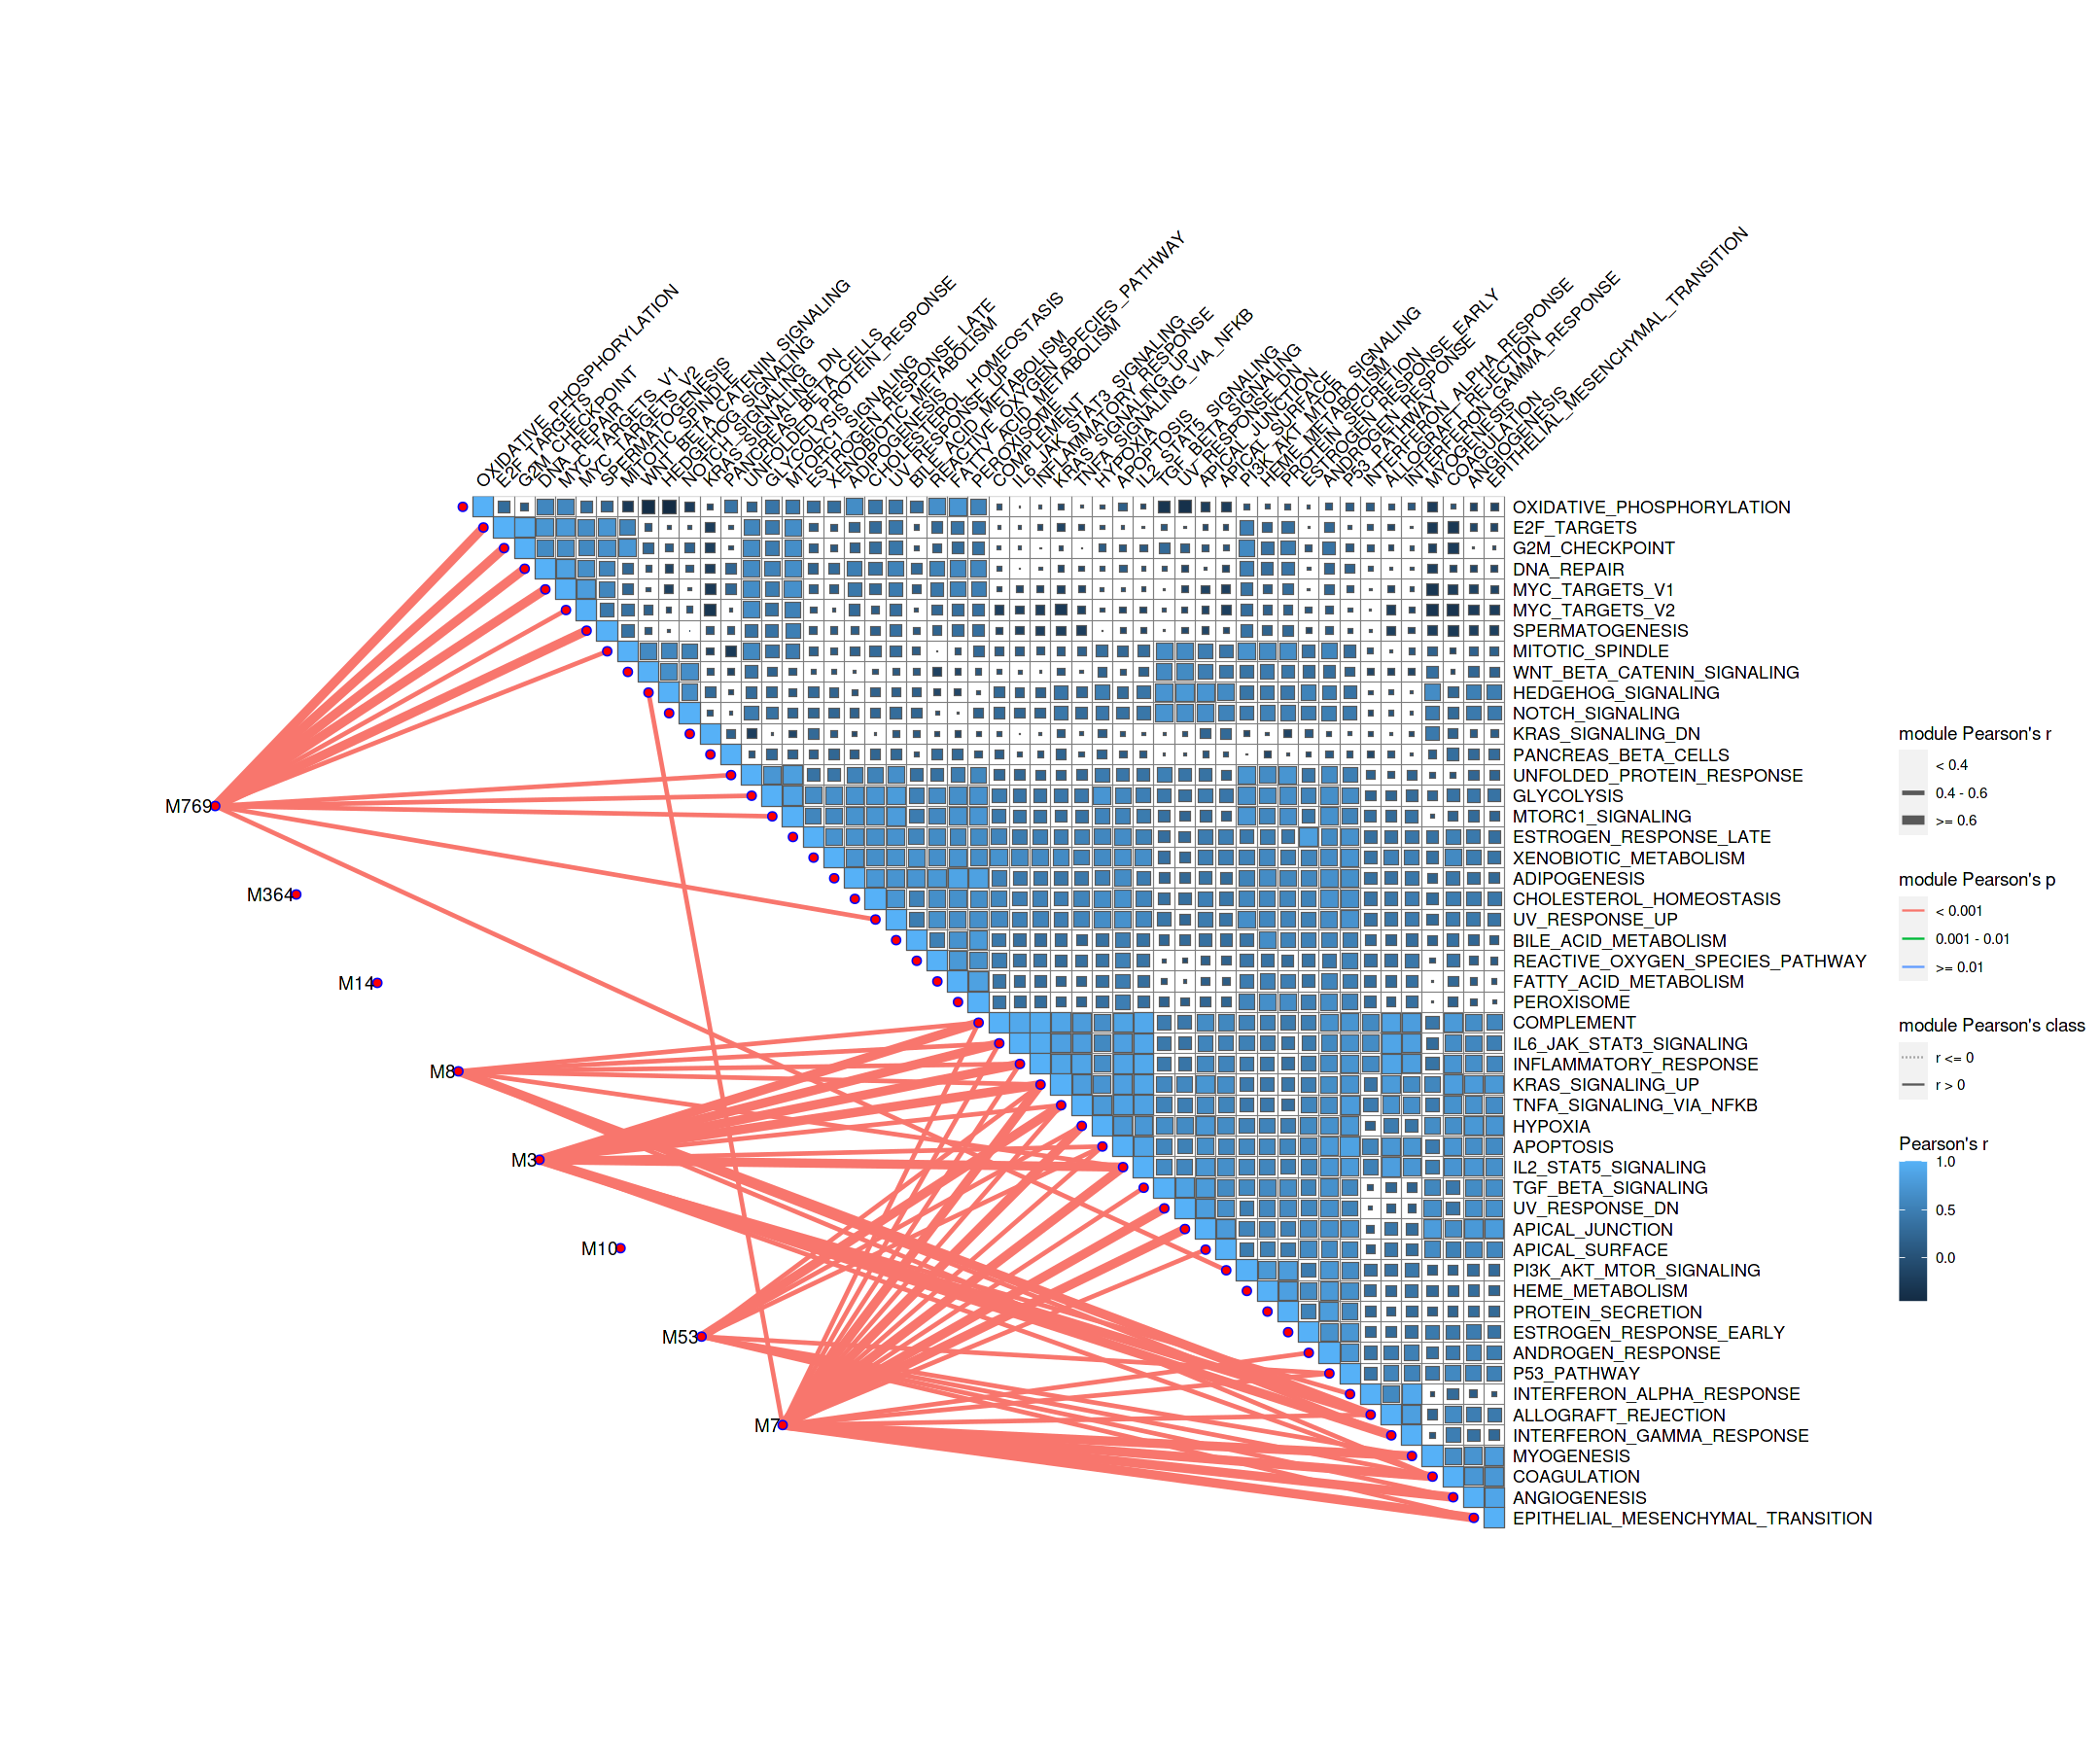

In [44]:
options(repr.plot.height = 15, repr.plot.width = 18)
p4 <- quickcor(t(OV_HALLMARKE_genesetGSVA[p11$tree_row$order,]), type = "upper") +
  geom_square() +
  anno_link(aes(colour = pd, linetype = lty,size=rd), data = mantel) +#定义连线 
  scale_size_manual(values = c(0, 1, 2))+ 
scale_linetype_manual(values = c("dotted", "solid")) +
  guides(size = guide_legend(title = "module Pearson's r",#定义图例 
                             order = 2), 
         colour = guide_legend(title = "module Pearson's p",  
                               order = 3), 
         linetype = guide_legend(title = "module Pearson's class",  
                               order = 4),
         fill = guide_colorbar(title = "Pearson's r", order = 5)) 
p4

In [45]:
pdf(file = './output/bulk/2.MEGENA_bulkModuleCor2Hallmarker.pdf',width = 18,height = 12)
print(p4)
dev.off()

png 
  2